In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [6]:
# Desired length
data_length = 80 

# Create data
epochs_group1 = np.repeat([20, 30, 40, 50, 60], data_length // 10)
epochs_group2 = np.repeat([20, 30, 40, 50, 60], data_length // 10)
subset = np.tile(['Train', 'Test'], data_length // 2)
metrics_group1 = np.tile(['Accuracy', 'Precision', 'Recall', 'F1-Score'], data_length // 8)
metrics_group2 = np.tile(['Accuracy', 'Precision', 'Recall', 'F1-Score'], data_length // 8)
group1 = np.repeat(['Group1'], data_length // 2)
group2 = np.repeat(['Group2'], data_length // 2)

# Concatenate metrics and position arrays for both groups
metrics = np.concatenate([metrics_group1, metrics_group2])
position = np.concatenate([group1, group2])
epochs = np.concatenate([epochs_group1, epochs_group2])

# Create data for models
random_forest_data = np.round(np.random.uniform(0.02, 1.0, data_length), 7)
naive_bayes_data = np.round(np.random.uniform(0.01, 0.83, data_length), 7)
neural_networks_data = np.round(np.random.uniform(0.12, 0.98, data_length), 7)
svm_data = np.round(np.random.uniform(0.05, 0.95, data_length), 7)

# Create a DataFrame
synthetic_data = {
    'Time_interval': epochs,
    'Subset': subset,
    'Metrics': metrics,
    'Random_forest': random_forest_data,
    'Naive_bayes_classifier': naive_bayes_data,
    'Neural_networks': neural_networks_data,
    'Support_vector_machine': svm_data,
    'Group': position
}

synthetic_df = pd.DataFrame(synthetic_data)

In [7]:
# Columns to plot
columns = ['Random_forest', 'Naive_bayes_classifier', 'Neural_networks', 'Support_vector_machine']

# Titles for each subplot
titles = ['Random Forest', 'Naive Bayes Classifier', 'Neural Networks', 'Support Vector Machine']

# Extract unique time intervals
categories = synthetic_df['Time_interval'].unique()
N = len(categories)

# Create angles for the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

/tmp/ipykernel_32164/1188998984.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i + 1, polar=True)  # Create a polar subplot


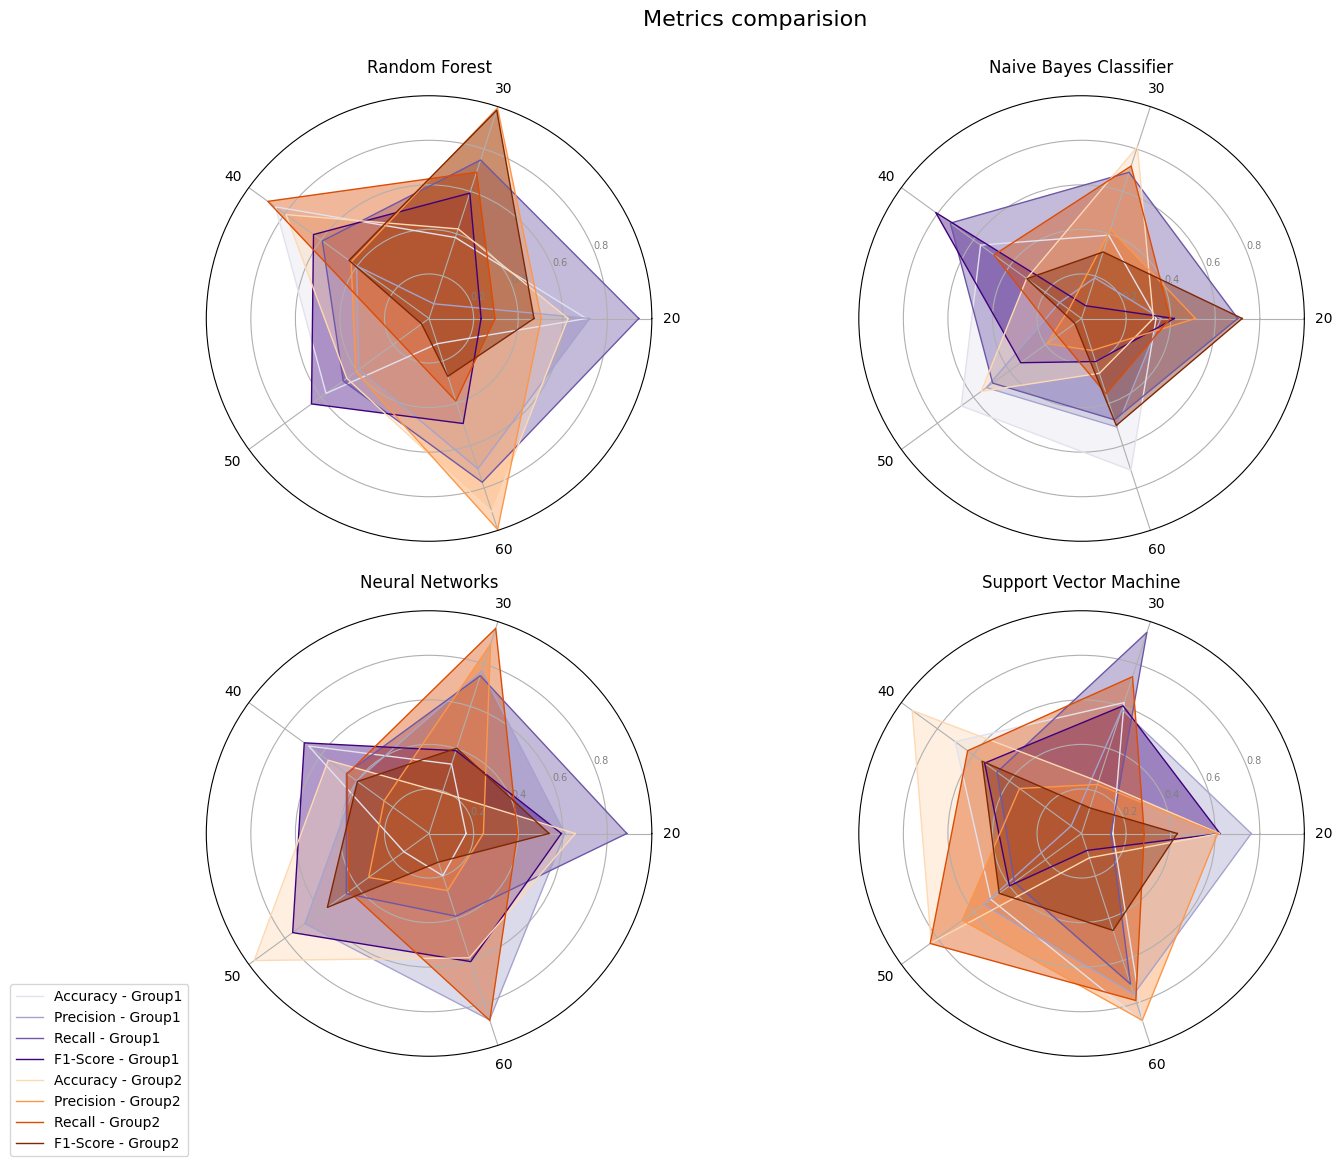

In [12]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 11))
axs = axs.flatten()

# Create an empty list for labels
labels = []

for i, column in enumerate(columns):
    # Initialize the spider plot
    ax = axs[i]
    ax = plt.subplot(2, 2, i + 1, polar=True)  # Create a polar subplot
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    ax.set_ylim(0, 1)
    
    # Add the subplot title
    ax.set_title(titles[i])

    for Group in synthetic_df['Group'].unique():
        Group_data = synthetic_df[synthetic_df['Group'] == Group]

        # Get a list of metrics for this Group
        metrics = Group_data['Metrics'].unique()

        # Generate different shades of the same color for each metric
        color_values = plt.cm.Purples(np.linspace(0.2, 1, len(metrics))) if Group == 'Group1' else plt.cm.Oranges(np.linspace(0.2, 1, len(metrics)))

        # Iterate over metrics
        for j, metric in enumerate(metrics):
            metric_data = Group_data[Group_data['Metrics'] == metric]

            # Initialize the values list for this metric
            values = [0] * N

            # Iterate over rows in the metric_data DataFrame
            for index, row in metric_data.iterrows():
                epoch_index = list(categories).index(row['Time_interval'])
                values[epoch_index] = row[column]

            # Close the radar chart
            values += values[:1]
            metric_color = color_values[j]

            # Plot and fill the radar chart with label
            line, = ax.plot(angles, values, linewidth=1, linestyle='solid', color=metric_color, label=f"{metric} - {Group}")
            ax.fill_between(angles, 0, values, facecolor=metric_color, alpha=0.4)

            
            # Append the label to the list
            if i == 0:
                labels.append(line)

# Add a common legend for all subplots
fig.legend(handles=labels, loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Adjust the layout to include the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a common title for the entire figure
fig.suptitle('Metrics comparision', fontsize=16)
# Save the figure with a larger size
plt.gcf().set_size_inches(14, 11)  # Adjust the size as needed
#plt.savefig('metrics_radar_plot_train.png', bbox_inches='tight', dpi=300)  # Specify the file format and resolution
plt.show()